In [1]:
# %% [code] {"execution":{"iopub.status.busy":"2024-05-28T06:27:32.205047Z","iopub.execute_input":"2024-05-28T06:27:32.205436Z","iopub.status.idle":"2024-05-28T06:27:32.379990Z","shell.execute_reply.started":"2024-05-28T06:27:32.205408Z","shell.execute_reply":"2024-05-28T06:27:32.377722Z"}}
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Models
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

dataset = pd.read_csv("/kaggle/input/mushroom-dataset/mushroom_cleaned.csv")
dataset.describe()

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# %% [code]


/kaggle/input/mushroom-dataset/mushroom_cleaned.csv


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


# Prepare the Dataset
First we'll have to get rid of the _outliers_
If we look at the description above, we'll see that there are rows with some values equal to 0
We removed those rows

Split the dataset into 2 parts used for:
- Training
- Evaluation

We assigned _20%_ of the *Dataset* for *testing*

In [2]:
dataset = dataset.drop(dataset[dataset["cap-diameter"]==0].index)
dataset= dataset.drop(dataset[dataset["cap-shape"]==0].index)
dataset = dataset.drop(dataset[dataset["gill-attachment"]==0].index)
dataset = dataset.drop(dataset[dataset["gill-color"]==0].index)
dataset = dataset.drop(dataset[dataset["stem-height"]==0].index)
dataset = dataset.drop(dataset[dataset["stem-width"]==0].index)
dataset = dataset.drop(dataset[dataset["stem-color"]==0].index)
dataset = dataset.drop(dataset[dataset["season"]==0].index)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model Selection
For selecting the model, I referred to the [cheat-sheet](https://i.sstatic.net/IMVOl.png) provided by `sklearn` documentation.
You can uncomment the other *2 models* and see how they perform, (All the necessary components are already imported)

In [3]:
# model = KNeighborsClassifier(n_neighbors=5)
# model = make_pipeline(StandardScaler(),
#                     LinearSVC(random_state=0, tol=1e-5))
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

# Evaluate the Model Predictions
In the following cell we'll display the Confusion Matrix and the accuracy of the model

SCORE: 0.9924134660976767


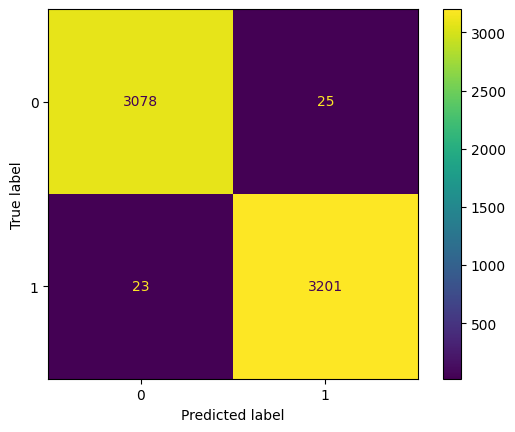

In [4]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

print("SCORE: " + str(accuracy_score(y_test, predictions)))
disp.plot()
plt.show()